In [1]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to load dataset using Tkinter
def load_dataset():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select a dataset", filetypes=[("CSV Files", "*.csv")])
    return pd.read_csv(file_path) if file_path else None

# Function to remove outliers using IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)  # 25th percentile
    Q3 = df.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Load dataset
df = load_dataset()
if df is None:
    print("No file selected. Exiting...")
    exit()

# Plot raw signal
plt.figure(figsize=(12, 5))
sns.lineplot(data=df)
plt.title("Raw Signal from Dataset")
plt.show()

# Remove outliers
cleaned_df = remove_outliers(df)

# Plot cleaned signal
plt.figure(figsize=(12, 5))
sns.lineplot(data=cleaned_df)
plt.title("Cleaned Signal (Outliers Removed)")
plt.show()

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# Function to create sequences for LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Time steps
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(X.shape[2])  # Output layer matches input shape
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Plot validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Training and Validation Loss")
plt.show()


ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [3]:
pip install --upgrade matplotlib seaborn


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\adwin adi\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 5.6 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.8 MB 5.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.8 MB 5.1 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.8 MB 5.0 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 4.1 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 3.6 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 3.3 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 3.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 2.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 2.6 MB/s eta 0:00:01
   ---------------

In [5]:
!pip uninstall matplotlib seaborn -y
!pip install matplotlib seaborn


Found existing installation: seaborn 0.11.2
Uninstalling seaborn-0.11.2:
  Successfully uninstalled seaborn-0.11.2


  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ADWIN ADI\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
import matplotlib
print(matplotlib.__version__)


3.9.2


In [8]:
!pip install seaborn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinkdsp 0.1.0 requires seaborn<0.12.0,>=0.11.0, but you have seaborn 0.13.2 which is incompatible.



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [11]:
!pip uninstall seaborn -y
!pip install seaborn --upgrade


Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinkdsp 0.1.0 requires seaborn<0.12.0,>=0.11.0, but you have seaborn 0.13.2 which is incompatible.



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [12]:
import seaborn as sns
print(sns.__version__)

ImportError: cannot import name '_version_predates' from 'seaborn.utils' (C:\Users\ADWIN ADI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py)

In [13]:
!pip install seaborn --upgrade

In [14]:
!pip list | findstr seaborn


seaborn                      0.13.2


In [16]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to load dataset using Tkinter
def load_dataset():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select a dataset", filetypes=[("CSV Files", "*.csv")])
    return pd.read_csv(file_path) if file_path else None

# Function to remove outliers using IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)  # 25th percentile
    Q3 = df.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Load dataset
df = load_dataset()
if df is None:
    print("No file selected. Exiting...")
    exit()

# Plot raw signal
plt.figure(figsize=(12, 5))
sns.lineplot(data=df)
plt.title("Raw Signal from Dataset")
plt.show()

# Remove outliers
cleaned_df = remove_outliers(df)

# Plot cleaned signal
plt.figure(figsize=(12, 5))
sns.lineplot(data=cleaned_df)
plt.title("Cleaned Signal (Outliers Removed)")
plt.show()

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# Function to create sequences for LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Time steps
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(X.shape[2])  # Output layer matches input shape
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Plot validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Training and Validation Loss")
plt.show()


ImportError: cannot import name '_version_predates' from 'seaborn.utils' (C:\Users\ADWIN ADI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py)

In [17]:
!pip uninstall seaborn matplotlib -y

Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: matplotlib 3.9.4


error: uninstall-no-record-file

Cannot uninstall matplotlib 3.9.4

The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.9.4


In [18]:
!pip install seaborn matplotlib --upgrade

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinkdsp 0.1.0 requires seaborn<0.12.0,>=0.11.0, but you have seaborn 0.13.2 which is incompatible.


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Seaborn version:", sns.__version__)
print("Matplotlib version:", plt.__version__)

ImportError: cannot import name '_version_predates' from 'seaborn.utils' (C:\Users\ADWIN ADI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

print("Seaborn version:", sns.__version__)
print("Matplotlib version:", plt.__version__)
print("SciPy version:", scipy.__version__)


ImportError: cannot import name '_version_predates' from 'seaborn.utils' (C:\Users\ADWIN ADI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

print("Seaborn version:", sns.__version__)
print("Matplotlib version:", plt.__version__)
print("SciPy version:", scipy.__version__)


ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [2]:
!pip install matplotlib

In [3]:
!pip install --upgrade matplotlib 

In [4]:
import matplotlib
import seaborn as sns

print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [5]:
!pip uninstall matplotlib -y


Found existing installation: matplotlib 3.9.4


error: uninstall-no-record-file

Cannot uninstall matplotlib 3.9.4

The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.9.4


In [6]:
!pip uninstall matplotlib -y


Found existing installation: matplotlib 3.9.4


error: uninstall-no-record-file

Cannot uninstall matplotlib 3.9.4

The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.9.4


In [7]:
!pip install --force-reinstall --no-deps matplotlib==3.9.4

error: uninstall-no-record-file

Cannot uninstall matplotlib 3.9.4

The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.9.4



  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.4


In [8]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to load dataset using Tkinter
def load_dataset():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select a dataset", filetypes=[("CSV Files", "*.csv")])
    return pd.read_csv(file_path) if file_path else None

# Function to remove outliers using IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)  # 25th percentile
    Q3 = df.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Load dataset
df = load_dataset()
if df is None:
    print("No file selected. Exiting...")
    exit()

# Plot raw signal
plt.figure(figsize=(12, 5))
sns.lineplot(data=df)
plt.title("Raw Signal from Dataset")
plt.show()

# Remove outliers
cleaned_df = remove_outliers(df)

# Plot cleaned signal
plt.figure(figsize=(12, 5))
sns.lineplot(data=cleaned_df)
plt.title("Cleaned Signal (Outliers Removed)")
plt.show()

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# Function to create sequences for LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Time steps
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(X.shape[2])  # Output layer matches input shape
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Plot validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Training and Validation Loss")
plt.show()


ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [2]:
!pip install matplotlib

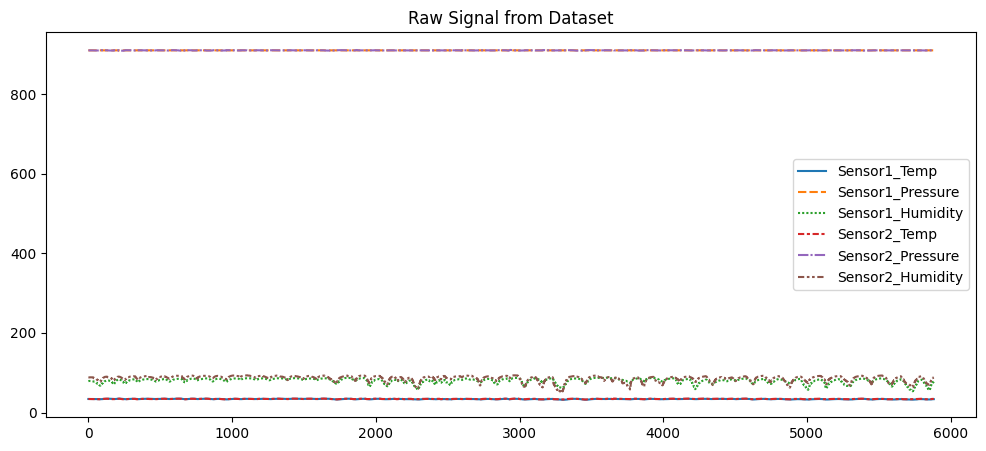

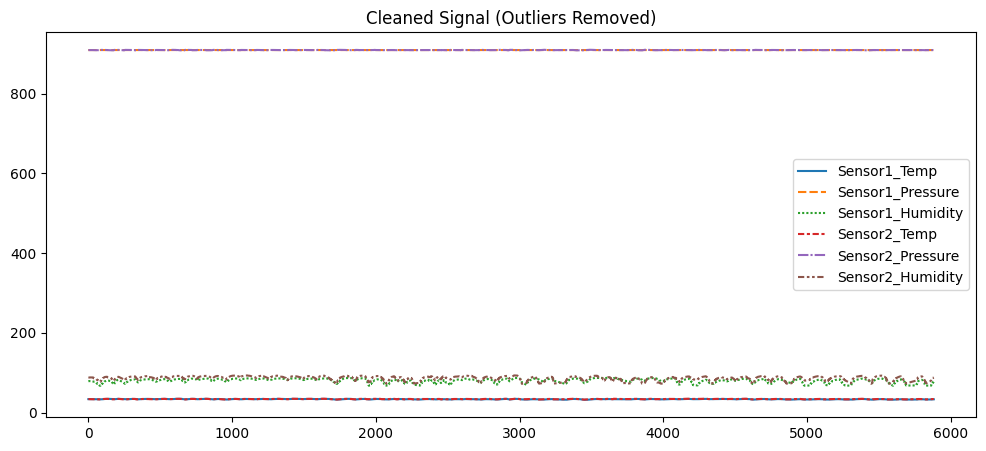

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            11400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 6)                 306       
                                                                 
Total params: 31,906
Trainable params: 31,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
257/257 [==============================] - 6s 9ms/step - loss: 0.0189 - val_loss: 0.0058
Epoch 2/20
257/257 [==============================] - 2s 6ms/step - loss: 0.0056 - val_loss: 0.0040
Epoch 3/20
257/257 [==============================] - 2s 6ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 4/20
257/2

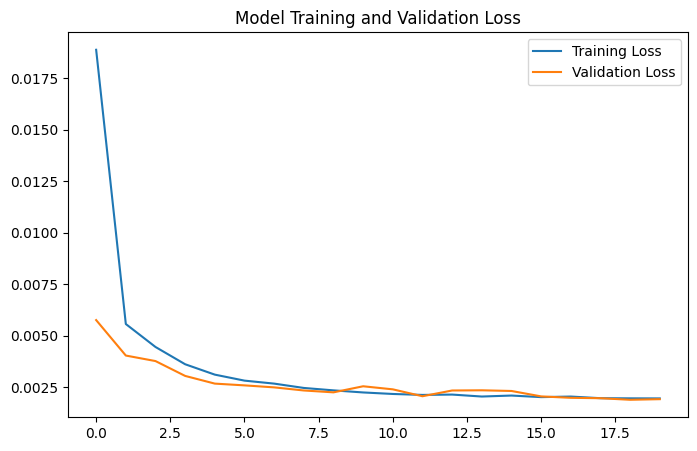

In [1]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to load dataset using Tkinter
def load_dataset():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select a dataset", filetypes=[("CSV Files", "*.csv")])
    return pd.read_csv(file_path) if file_path else None

# Function to remove outliers using IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)  # 25th percentile
    Q3 = df.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Load dataset
df = load_dataset()
if df is None:
    print("No file selected. Exiting...")
    exit()

# Plot raw signal
plt.figure(figsize=(12, 5))
sns.lineplot(data=df)
plt.title("Raw Signal from Dataset")
plt.show()

# Remove outliers
cleaned_df = remove_outliers(df)

# Plot cleaned signal
plt.figure(figsize=(12, 5))
sns.lineplot(data=cleaned_df)
plt.title("Cleaned Signal (Outliers Removed)")
plt.show()

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# Function to create sequences for LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Time steps
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(X.shape[2])  # Output layer matches input shape
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Plot validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Training and Validation Loss")
plt.show()


In [1]:
import matplotlib
print("Matplotlib version:", matplotlib.__version__)


Matplotlib version: 3.9.4
